This is model2 Correlational Analysis. The purpose of this notebook is to create a heatmap visualiztion and identify specific sleep and fitness metrics that have higher correlational relationships.

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# Load datasets
minute_sleep_data = pd.read_csv('/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv')
daily_activity_data = pd.read_csv('/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv')
hourly_intensities_data = pd.read_csv('/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv')
hourly_steps_data = pd.read_csv('/Users/jamesmoy/Desktop/Sleep Fitness Data/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv')

In [88]:
# Data Cleaning
# Standardize column names
minute_sleep_data.columns = minute_sleep_data.columns.str.lower().str.replace(' ', '_')
daily_activity_data.columns = daily_activity_data.columns.str.lower().str.replace(' ', '_')
hourly_intensities_data.columns = hourly_intensities_data.columns.str.lower().str.replace(' ', '_')
hourly_steps_data.columns = hourly_steps_data.columns.str.lower().str.replace(' ', '_')


In [89]:
# Convert timestamps to datetime, allowing pandas to infer the format
minute_sleep_data['date'] = pd.to_datetime(minute_sleep_data['date'], infer_datetime_format=True, errors='coerce')


/var/folders/w6/vkcmr8l91_12vz93c0c46mtm0000gn/T/ipykernel_45363/2040606621.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  minute_sleep_data['date'] = pd.to_datetime(minute_sleep_data['date'], infer_datetime_format=True, errors='coerce')
/var/folders/w6/vkcmr8l91_12vz93c0c46mtm0000gn/T/ipykernel_45363/2040606621.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  minute_sleep_data['date'] = pd.to_datetime(minute_sleep_data['date'], infer_datetime_format=True, errors='coerce')


In [97]:
# Ensure datetime columns are in a consistent and usable format
minute_sleep_data['date'] = pd.to_datetime(minute_sleep_data['date'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')
daily_activity_data['activitydate'] = pd.to_datetime(daily_activity_data['activitydate'], errors='coerce', format='%m/%d/%Y')
hourly_intensities_data['activityhour'] = pd.to_datetime(hourly_intensities_data['activityhour'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')
hourly_steps_data['activityhour'] = pd.to_datetime(hourly_steps_data['activityhour'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')


In [98]:
# Aggregating sleep data to daily level
daily_sleep_data = minute_sleep_data.groupby(['id', minute_sleep_data['date'].dt.date])['value'].sum().reset_index()
daily_sleep_data.rename(columns={'value': 'total_sleep_duration', 'date': 'activitydate'}, inplace=True)


In [99]:
print("Sample rows after date conversion in minute_sleep_data:")
print(daily_sleep_data[['id', 'activitydate']].head())

print("Sample rows after date conversion in daily_activity_data:")
print(daily_activity_data[['id', 'activitydate']].head())

Sample rows after date conversion in minute_sleep_data:
             id activitydate
0  1.503960e+09   2016-03-12
1  1.503960e+09   2016-03-13
2  1.503960e+09   2016-03-14
3  1.503960e+09   2016-03-15
4  1.503960e+09   2016-03-16
Sample rows after date conversion in daily_activity_data:
           id activitydate
0  1503960366   2016-03-25
1  1503960366   2016-03-26
2  1503960366   2016-03-27
3  1503960366   2016-03-28
4  1503960366   2016-03-29


In [100]:
# Check for NaT values after conversion
print("Number of NaT values in date after inference:", minute_sleep_data['date'].isna().sum())

# Print sample rows with NaT values for inspection
print("Sample rows with NaT values in date after conversion:")
print(minute_sleep_data[minute_sleep_data['date'].isna()].head())



Number of NaT values in date after inference: 0
Sample rows with NaT values in date after conversion:
Empty DataFrame
Columns: [id, date, value, logid]
Index: []


In [101]:
# Aggregating sleep data to daily level
daily_sleep_data = minute_sleep_data.groupby(['id', minute_sleep_data['date'].dt.date])['value'].sum().reset_index()
daily_sleep_data.rename(columns={'value': 'total_sleep_duration', 'date': 'activitydate'}, inplace=True)


In [102]:
# Convert 'activitydate' to datetime format in daily_sleep_data to match the type in daily_activity_data
daily_sleep_data['activitydate'] = pd.to_datetime(daily_sleep_data['activitydate'])

In [103]:
merged_debug = pd.merge(daily_sleep_data, daily_activity_data, on=['id', 'activitydate'], how='outer', indicator=True)
print(merged_debug['_merge'].value_counts())


_merge
right_only    397
left_only     102
both           60
Name: count, dtype: int64


In [104]:
merged_daily_data = pd.merge(daily_sleep_data, daily_activity_data, on=['id', 'activitydate'], how='outer', indicator=True)
print(merged_daily_data['_merge'].value_counts())


_merge
right_only    397
left_only     102
both           60
Name: count, dtype: int64


In [105]:
# Merging datasets on Id and date/hour as applicable
# Merge sleep data with daily activity data on 'id' and 'activitydate'
merged_daily_data = pd.merge(daily_sleep_data, daily_activity_data, on=['id', 'activitydate'], how='inner')


In [108]:
# Aggregating hourly data to daily level for intensities and steps
daily_intensities_data = hourly_intensities_data.groupby(['id', hourly_intensities_data['activityhour'].dt.date])[
    ['totalintensity', 'averageintensity']].sum().reset_index()
daily_intensities_data.rename(columns={'activityhour': 'activitydate'}, inplace=True)

In [107]:
daily_steps_data = hourly_steps_data.groupby(['id', hourly_steps_data['activityhour'].dt.date])['steptotal'].sum().reset_index()
daily_steps_data.rename(columns={'activityhour': 'activitydate'}, inplace=True)

In [111]:
# Convert 'activitydate' to datetime format in daily_intensities_data and daily_steps_data
daily_intensities_data['activitydate'] = pd.to_datetime(daily_intensities_data['activitydate'], format='%Y-%m-%d')
daily_steps_data['activitydate'] = pd.to_datetime(daily_steps_data['activitydate'], format='%Y-%m-%d')


In [112]:
# Merging datasets on Id and date
# Merge sleep data with daily activity data on 'id' and 'activitydate'
merged_daily_data = pd.merge(daily_sleep_data, daily_activity_data, on=['id', 'activitydate'], how='inner')

In [113]:
# Ensure 'activitydate' columns are of the same data type in all dataframes before merging
daily_intensities_data['activitydate'] = pd.to_datetime(daily_intensities_data['activitydate'])
daily_steps_data['activitydate'] = pd.to_datetime(daily_steps_data['activitydate'])
merged_daily_data['activitydate'] = pd.to_datetime(merged_daily_data['activitydate'])

In [114]:
# Merge the aggregated intensities and steps data with the existing merged_daily_data
merged_daily_data = pd.merge(merged_daily_data, daily_intensities_data, on=['id', 'activitydate'], how='inner')
merged_daily_data = pd.merge(merged_daily_data, daily_steps_data, on=['id', 'activitydate'], how='inner')

IndentationError: unexpected indent (2434513598.py, line 2)

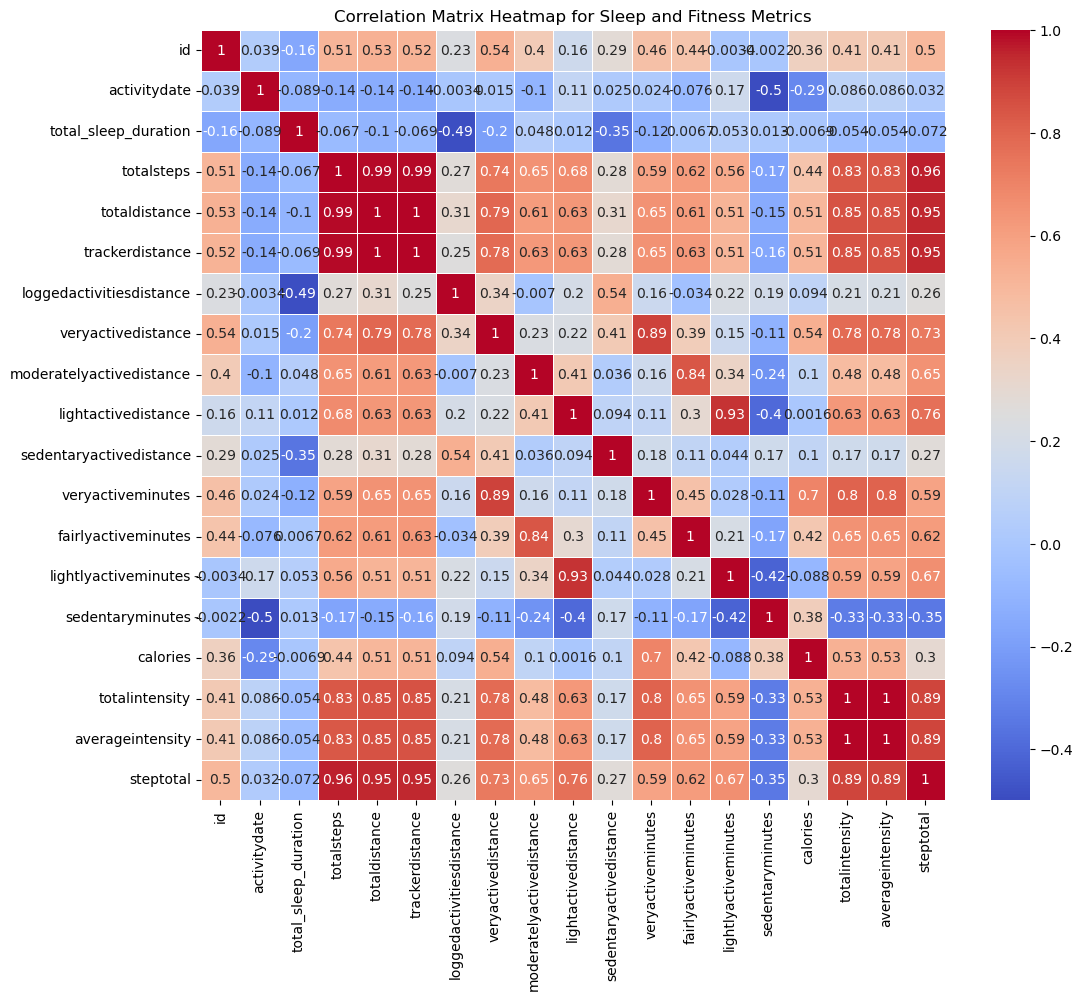


Correlation Analysis Summary:

Strong correlations for id:
id                    1.000000
totalsteps            0.511441
totaldistance         0.526311
trackerdistance       0.520422
veryactivedistance    0.535390
steptotal             0.501784
Name: id, dtype: float64

Strong correlations for activitydate:
activitydate    1.0
Name: activitydate, dtype: float64

Strong correlations for total_sleep_duration:
total_sleep_duration    1.0
Name: total_sleep_duration, dtype: float64

Strong correlations for totalsteps:
id                          0.511441
totalsteps                  1.000000
totaldistance               0.992906
trackerdistance             0.993604
veryactivedistance          0.739922
moderatelyactivedistance    0.650459
lightactivedistance         0.675444
veryactiveminutes           0.587779
fairlyactiveminutes         0.618067
lightlyactiveminutes        0.556926
totalintensity              0.831936
averageintensity            0.831936
steptotal                   0.959432

In [117]:
# Check if merged_daily_data is empty
if merged_daily_data.empty:
    print("Merged dataset is empty. Please check the merge conditions or the data alignment.")
else:
    # Generate Correlation Matrix
    correlation_matrix = merged_daily_data.corr(method='pearson')

    # Check if correlation matrix contains valid data
    if correlation_matrix.isnull().values.all():
        print("Correlation matrix contains only NaN values. Please check the data for issues.")
    else:
        # Heatmap Visualization
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix Heatmap for Sleep and Fitness Metrics')
        plt.show()
  # Text Output for Interpretation
        print("\nCorrelation Analysis Summary:")
        for column in correlation_matrix.columns:
            strong_corr = correlation_matrix[column][(correlation_matrix[column] > 0.5) | (correlation_matrix[column] < -0.5)]
            if not strong_corr.empty:
                print(f"\nStrong correlations for {column}:")
                print(strong_corr)